# Trabalho 3 - Clusterização Fuzzy

## DCA0133 - APRENDIZAGEM DE MÁQUINA E MINERAÇÃO DE DADOS

### 20190152879 - Angelo Marcelino Cordeiro

### 20190153007 - Richardson Santiago Teles de Menezes

Os princípios da lógica fuzzy podem ser usados para agrupar dados multidimensionais, atribuindo a cada ponto um valor de 0 a 100% representando o valor da função de pertencimento a cada centro de agrupamento. Isso pode ser muito poderoso em comparação com o clustering de limite rígido tradicional, onde cada ponto é atribuído a um rótulo nítido e exato.

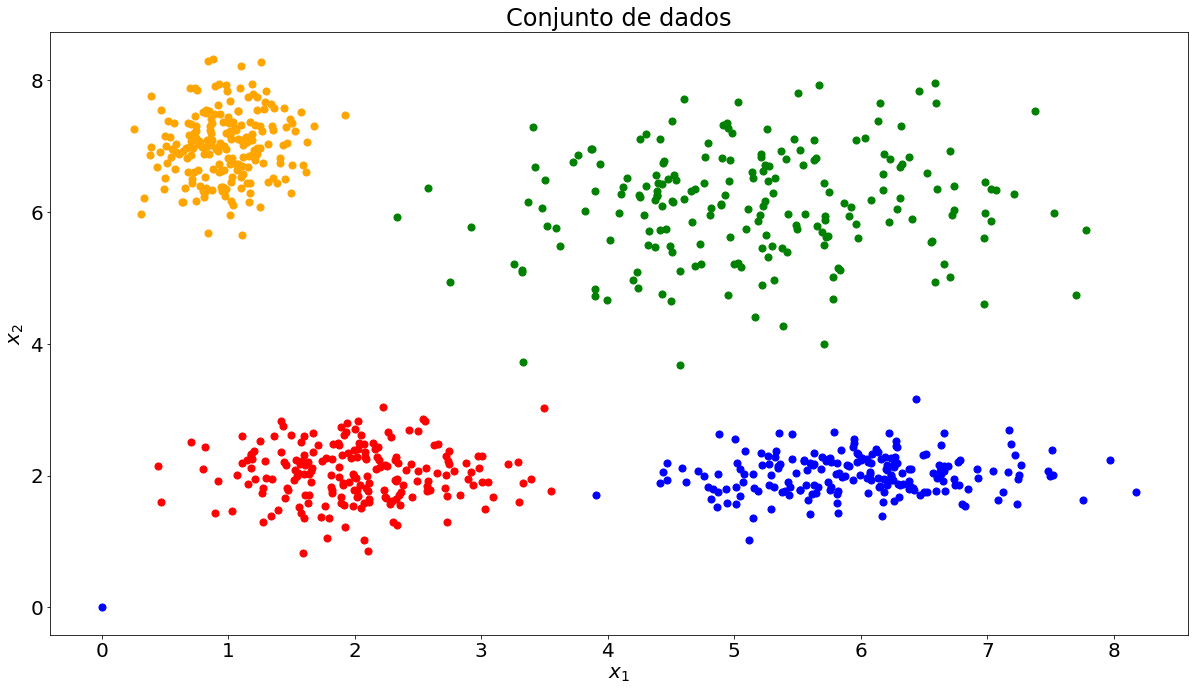

In [115]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

colors = [
    'b', 'orange', 'g', 
    'r', 'c', 'm', 'y', 
    'k', 'Brown', 'ForestGreen'
]

# Define three cluster centers
centers = [
    [6, 2],
    [1, 7],
    [5, 6],
    [2, 2]
]

# Define three cluster sigmas in x and y, respectively
sigmas = [
    [0.8, 0.3],
    [0.3, 0.5],
    [1.1, 0.8],
    [0.6, 0.4]
]

# Generate test data
np.random.seed(42)  
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)

for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots(figsize=(17, 10))
for label in range(4):
    ax0.scatter(
        xpts[labels == label], 
        ypts[labels == label], 
        s=50, 
        color=colors[label]
    )

ax0.set(
    title='Conjunto de dados',
    xlabel='$x_1$',
    ylabel='$x_2$'
)

plt.tight_layout()
plt.show()



## Clustering

Vemos agrupamentos distintas se formando no conjunto de dados. No entanto, o que aconteceria se não soubéssemos quantos clusters devemos esperar? Talvez se os dados não estivessem tão claramente agrupados? 

Tentamos então agrupar os dados várias vezes, com entre 2 e 9 clusters e avaliamos a perfomance do algoritmo.

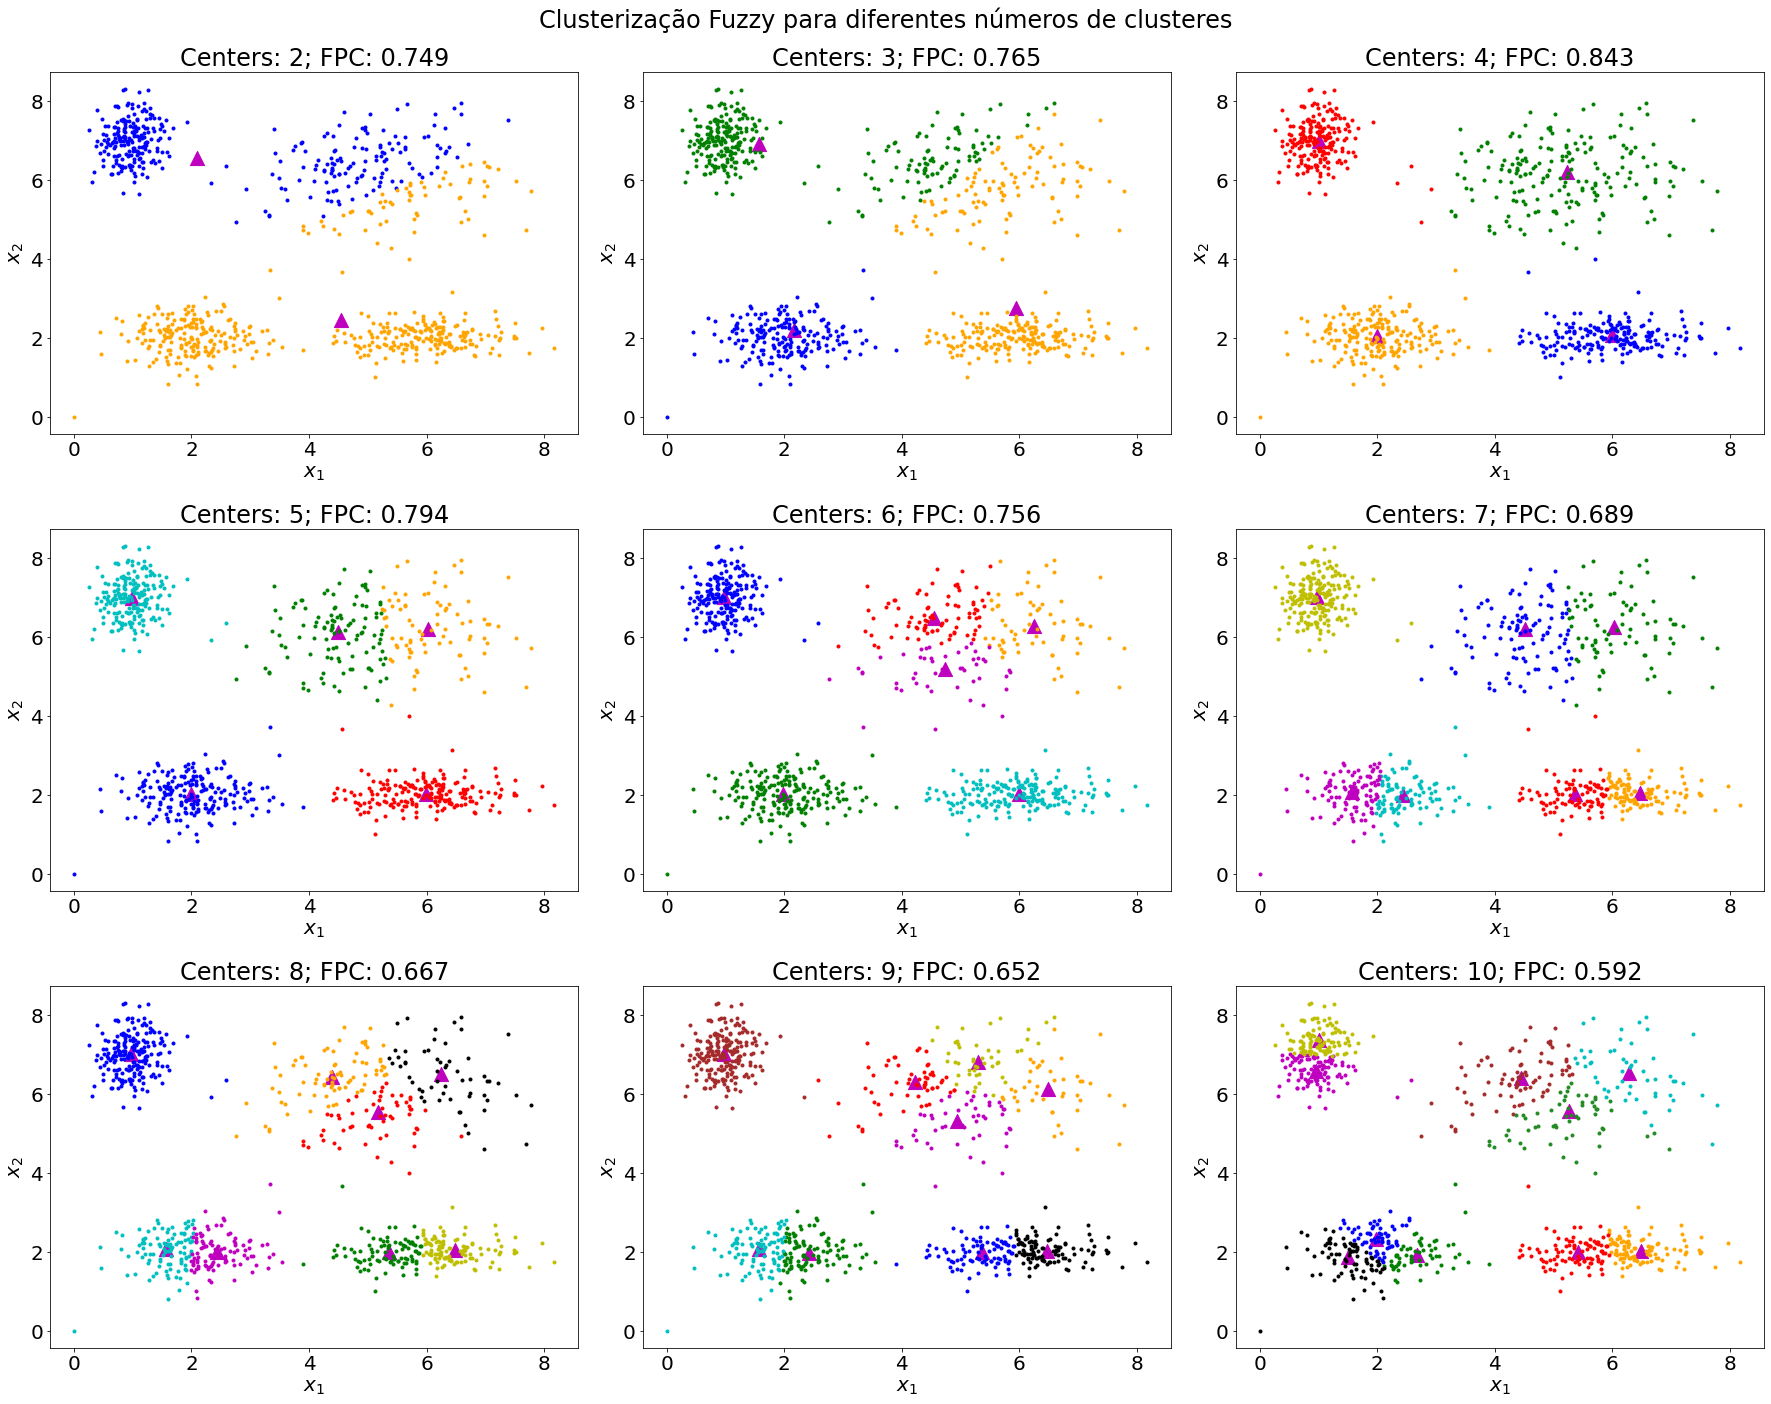

In [128]:
import skfuzzy as fuzz

fig, axes = plt.subplots(3, 3, figsize=(25, 20))

alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, 
        ncenters, 2, 
        error=0.005, 
        maxiter=1000, 
        init=None
    )

    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for center in range(ncenters):
        ax.plot(
            xpts[cluster_membership == center],
            ypts[cluster_membership == center], 
            '.', color=colors[center]
        )

     # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.scatter(pt[0], pt[1], marker='^', c='m', s=200)

    ax.set(
        title=f'Centers: {ncenters}; FPC: {fpc:.3f}',
        xlabel='$x_1$',
        ylabel='$x_2$'
    )

fig.suptitle('Clusterização Fuzzy para diferentes números de clusteres')
plt.tight_layout()
plt.show()





## O coeficiente de partição fuzzy (fuzzy partition coefficient - FPC)

O FPC é definido no intervalo de 0 a 1, sendo 1 o melhor. É uma métrica que nos diz o quão bem nossos dados são descritos por um determinado modelo.

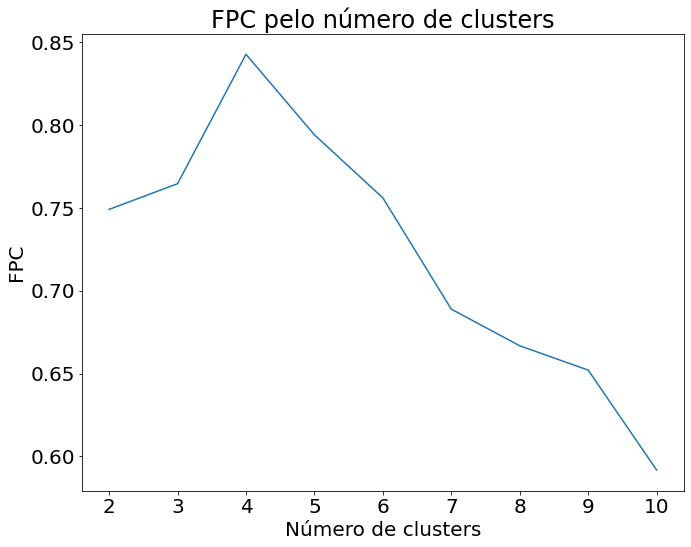

In [133]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(np.r_[2:11], fpcs)

ax.set(
    title='FPC pelo número de clusters',
    xlabel='Número de clusters',
    ylabel='FPC'
)

plt.tight_layout()
plt.show()

Assim confirmamos como esperado que 4 clusters representa a melhor partição dos dados como esperado pela distribuição inicial dos dados.